# Bike Sharing Assignment

# problem statement : 

* A US bike-sharing  `BoomBikes` has a daily dataset on the rental bikes based on a various environmental and seasonal settings.their aspiration is to use this data to understand the factors affecting the demands for the shared bikes in American market and come up with a mindful buisness plan to able to accelarate their revenue as soon as the ongoing lockdown due to corona pandemic comes to end.

Essentially,the company wants -

* Which variables are significant in predicting the demand for shared bikes.

* How well those variables describe the bike demands

The solution is devided in to following sections :
    
- Data understanding and exploration
    
- Data visualization
    
- Data preparation
    
- Model building and evaluation

# step 1: Reading and understanding the data


Letus start with the following steps :
    
- Importing the data using numpy and pandas library.
- Understanding the structure of the data.

In [1]:
# import depended libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing dataset

biker=pd.read_csv('day.csv')
biker

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [3]:
# Let's take a look at the number of rows and columns of the dataset

biker.shape

(730, 16)

In [4]:
# understanding the column names in the data frame

biker.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [5]:
# dataset summary : 730 columns,16 rows,no null values
biker.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
#getting insight of the features of the dataest
biker.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
biker.isnull().sum() # We can see that there is no null values present in data.

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
# Checking  if there any duplicates row.

duplicate_rows = len(biker[biker.duplicated()])
print("Count of duplicate rows:",round(duplicate_rows,2))

Count of duplicate rows: 0


In [9]:
#dropping the unwanted columns
#instant has only one index for the row,dteday has date which can be compensated by yr and mnth column
#casual and registered seems to be the break up by category for count column

biker.drop(['instant','dteday','casual','registered',],axis=1,inplace=True)

In [10]:
# Form data dictionary and abvoe analysis we can say that  season, weathersit & month are catogorical values but found as int.
#Lets Convert season, weathersit & month to Catogory type

biker['season']=biker['season'].astype('category')
biker['weathersit']=biker['weathersit'].astype('category')
biker['mnth']=biker['mnth'].astype('category')
biker.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    int64   
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(3), float64(4), int64(5)
memory usage: 54.3 KB


In [11]:
#encoding the season column

biker.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)
biker.weathersit.replace({1:'clear',2:'mix_cloudy',3:'light_snowrain',4:'heavy_snowrain'},inplace = True)
biker.mnth = biker.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun', 7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})
biker.weekday = biker.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})

In [12]:
#letus check the head of the dataset
biker.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,mix_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,mix_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


# STEP 2 : Visualizing the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.

- If there is some obvious multicollinearity going on, this is the first place to catch it
    
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

 ## EDA
 
 ### Univariate analysis

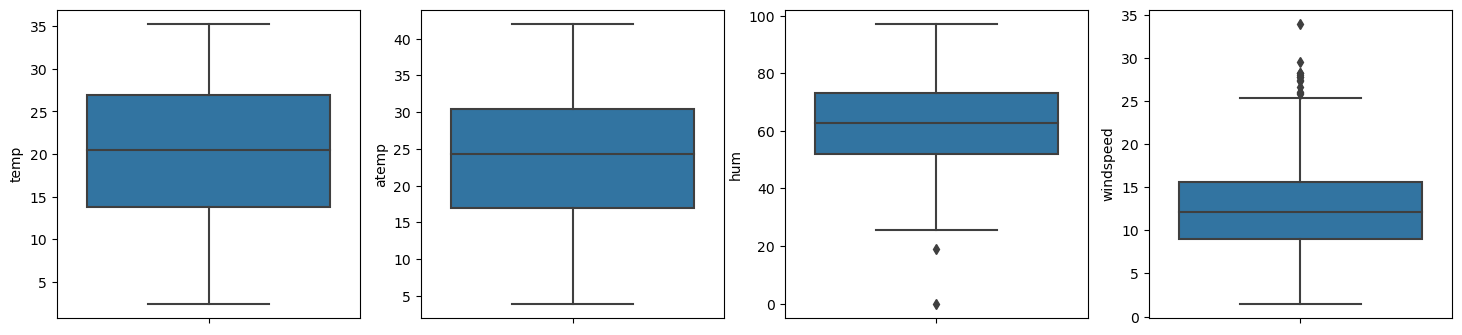

In [13]:
# Lets check if any outliers present is numeric featires.
# raw box plots for indepent variables with continuous values

cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(18,4))

k = 1
for col in cols:
    plt.subplot(1,4,k)
    sns.boxplot(y=col, data=biker)
    k+=1

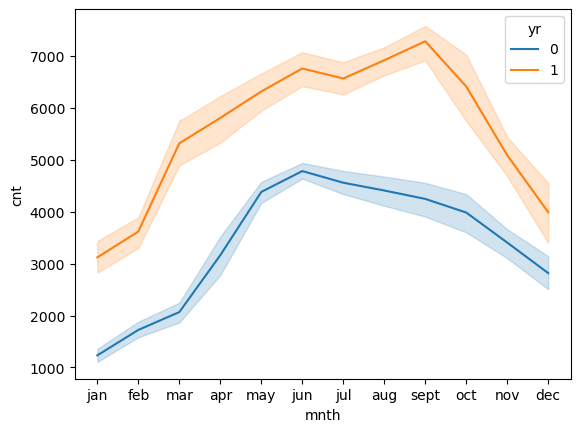

In [14]:
# Line graph will that show the count vs month for year 2018 and 2019.
sns.lineplot(x = "mnth", y = "cnt", data=biker ,hue = "yr")
plt.show() 

Inferences:
- 1. From Line Graph we can see that target Variable cnt has increased from 2018 to 2019.
- 2. Demand for bike is high between may to oct for year 2018 and 2019.
- 3. From Boxchart we can also see that there is no outliers present.

**Visualising Numeric Variables**

Let's make a pairplot of all the numeric variables

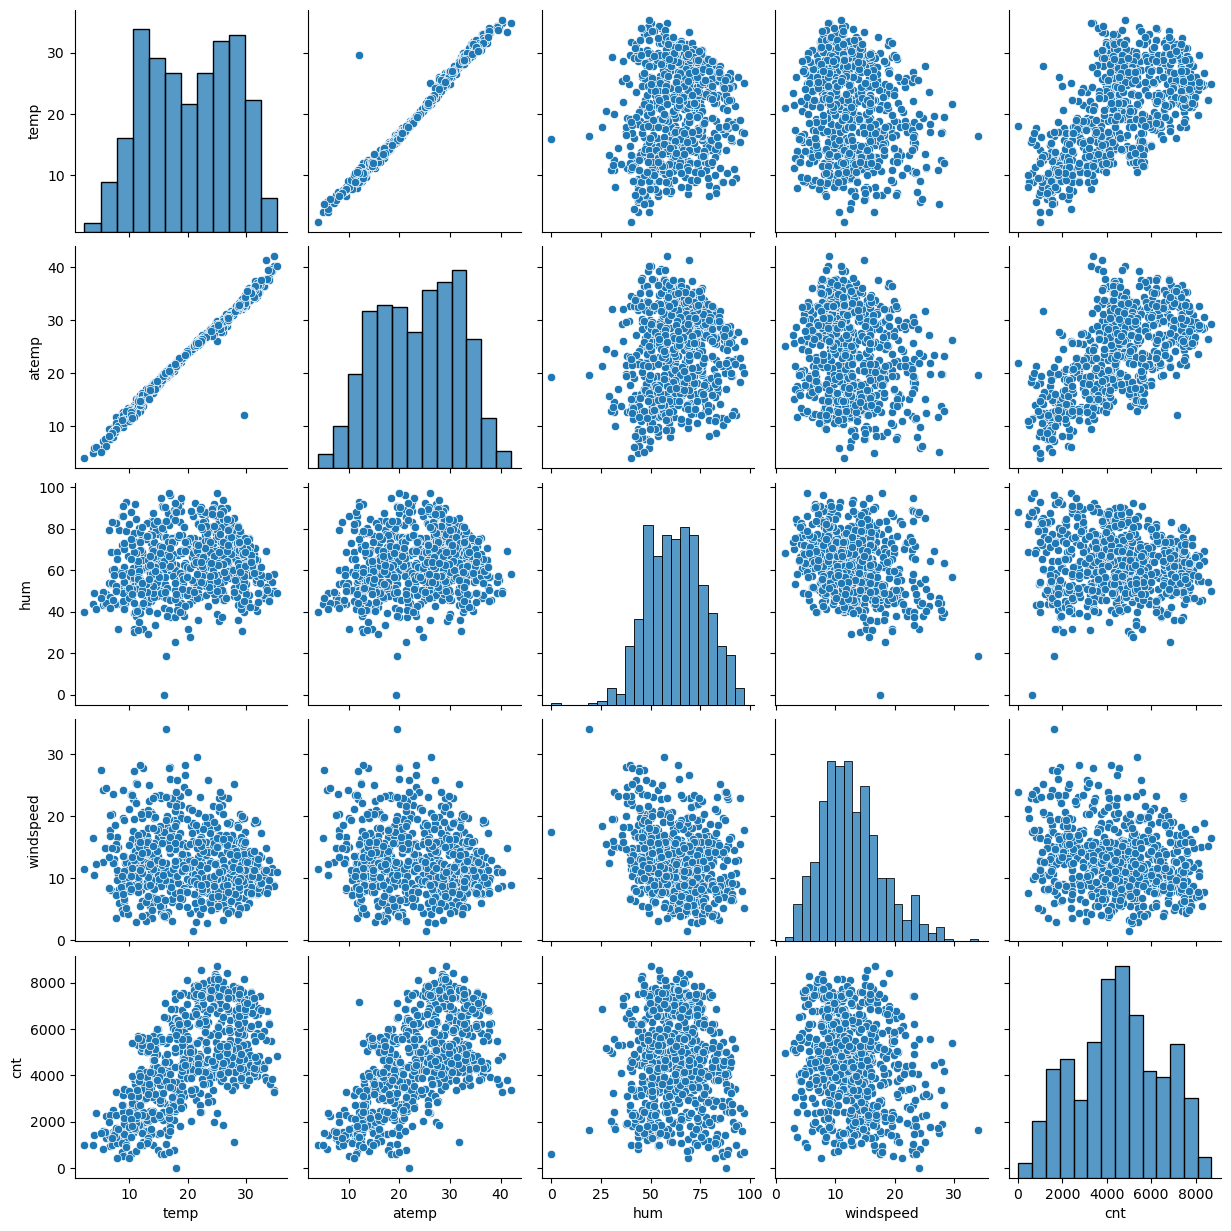

In [15]:
# Analysing/visualizing the numerical columns

sns.pairplot(data=biker,vars=['temp','atemp','hum','windspeed','cnt'])
plt.show()

Inferences:
- 1. We can see that we have linealy dependecy between temp, atemp and count.
- 2. we can also see that temp and atemp is highly correlated.

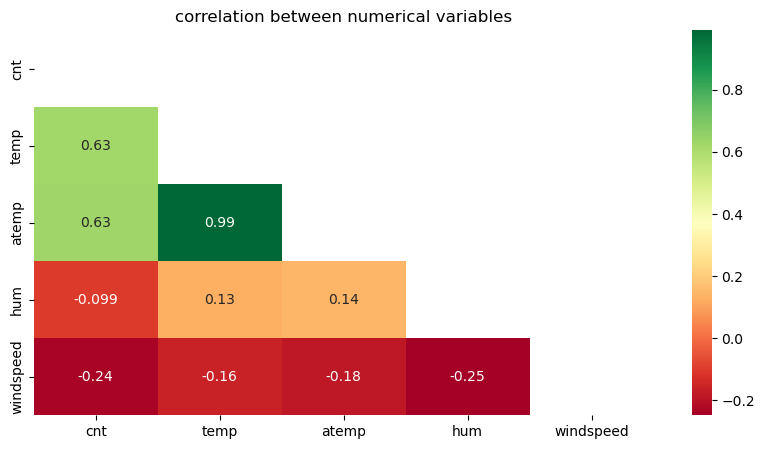

In [16]:
#checking the correlation between numerical variables

plt.figure(figsize=(10,5))
matrix=np.triu(biker[['cnt','temp','atemp','hum','windspeed']].corr())
sns.heatmap(biker[['cnt','temp','atemp','hum','windspeed']].corr(),annot=True,cmap="RdYlGn",mask=matrix)
plt.title('correlation between numerical variables')
plt.show()

- There is linear relationship between temp and atemp. Both of the parameters cannot be used in the model due to multicolinearity. We will decide which parameters to keep based on VIF and p-value w.r.t other variables.

###  Bivariate analysis

**Visualising Categorical Variables**

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

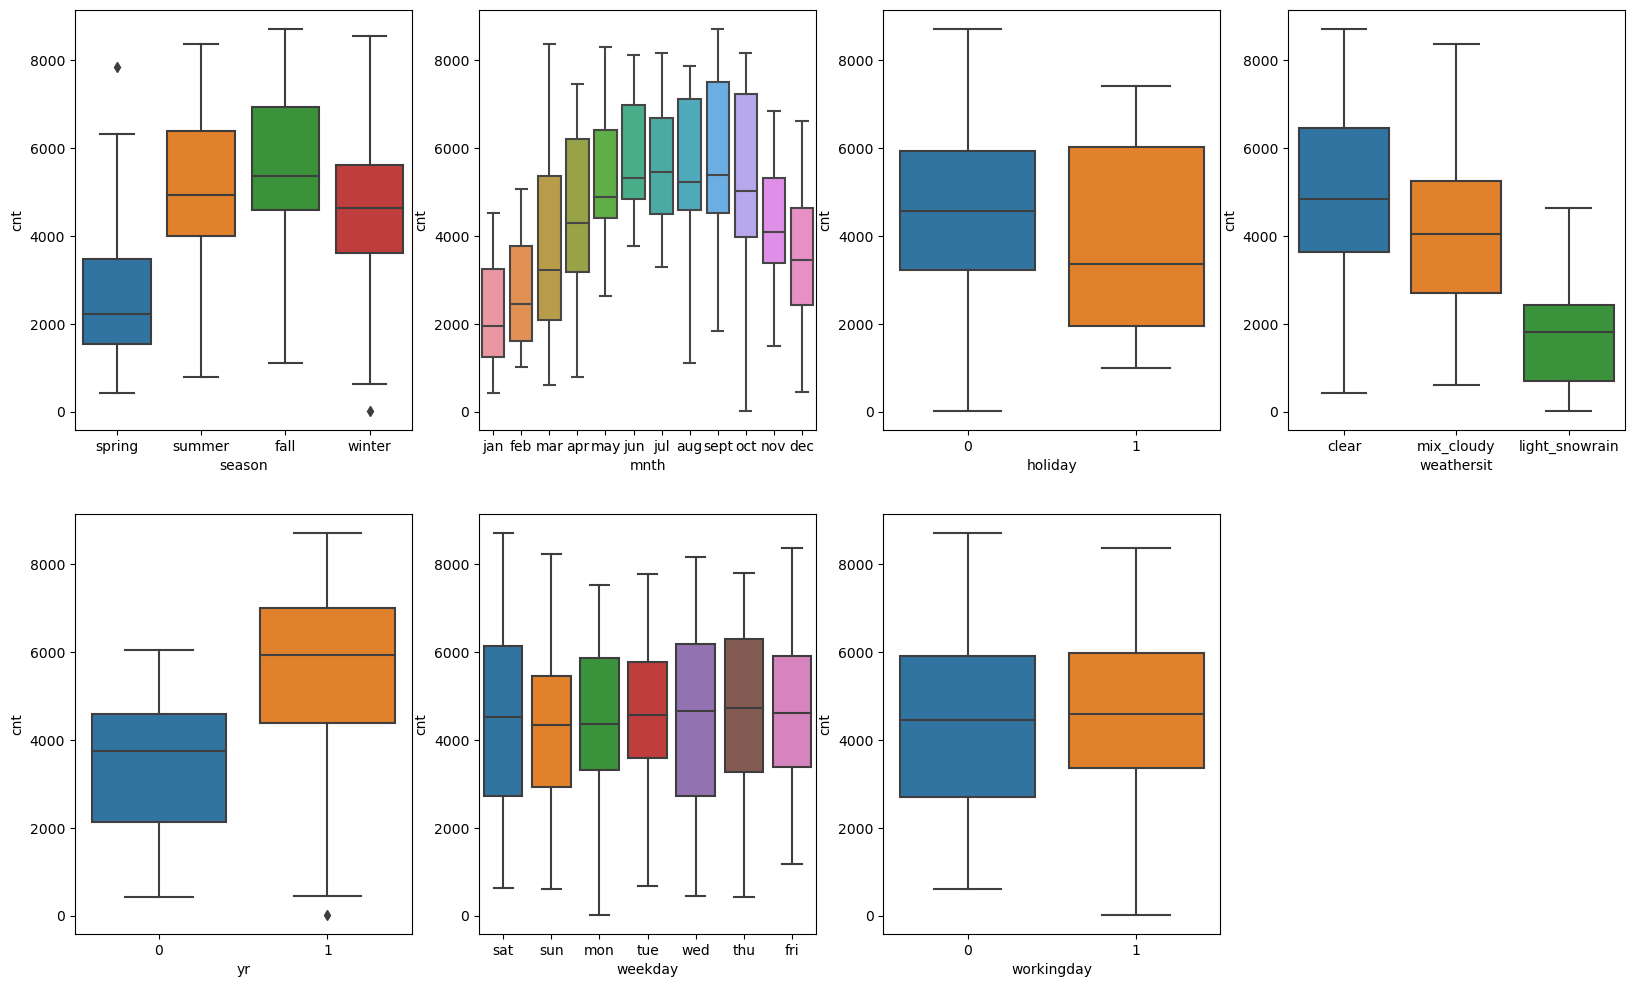

In [17]:
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = biker)
plt.subplot(2,4,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = biker)
plt.subplot(2,4,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = biker)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = biker)
plt.subplot(2,4,5)
sns.boxplot(x = 'yr', y = 'cnt', data = biker)
plt.subplot(2,4,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = biker)
plt.subplot(2,4,7)
sns.boxplot(x = 'workingday', y = 'cnt', data = biker)

plt.show()

In [18]:
#function to create barplot related to categorical column

def plot_columns(column):
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    sns.barplot(x=column,y='cnt',data=biker)
    plt.subplot(1,2,2)
    sns.barplot(x=column,y='cnt',data=biker,hue='yr')
    plt.legend(labels=['2018','2019'])
    plt.show()

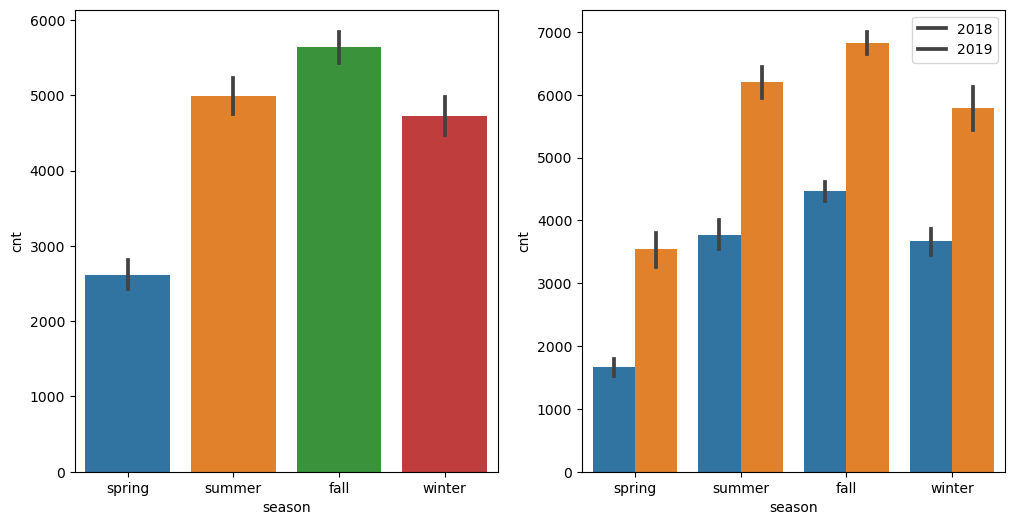

In [19]:
plot_columns('season')

Inferences:
- 1. Fall  seasons is having high number bike rental.
- 2. Bike rental in 2019 has increaded for every seasion compared to 2018.

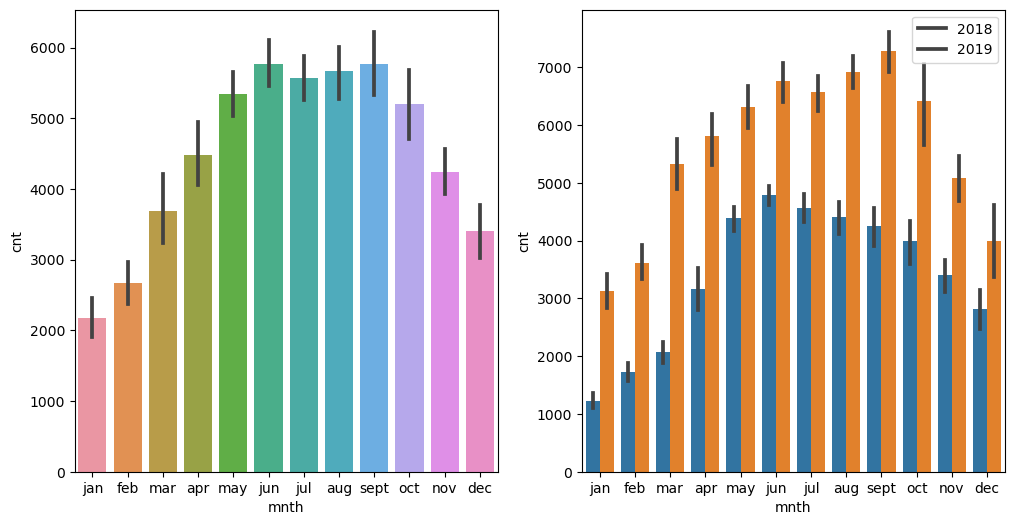

In [20]:
#plotting visualization for mnth column
plot_columns('mnth')

Most of the bookings has been done during the month of may, june, july, aug, sep and oct.Trend increased starting of the year till mid of the year and then it started decreasing as we approached the end of year. Number of booking for each month seems to have increased from 2018 to 2019.

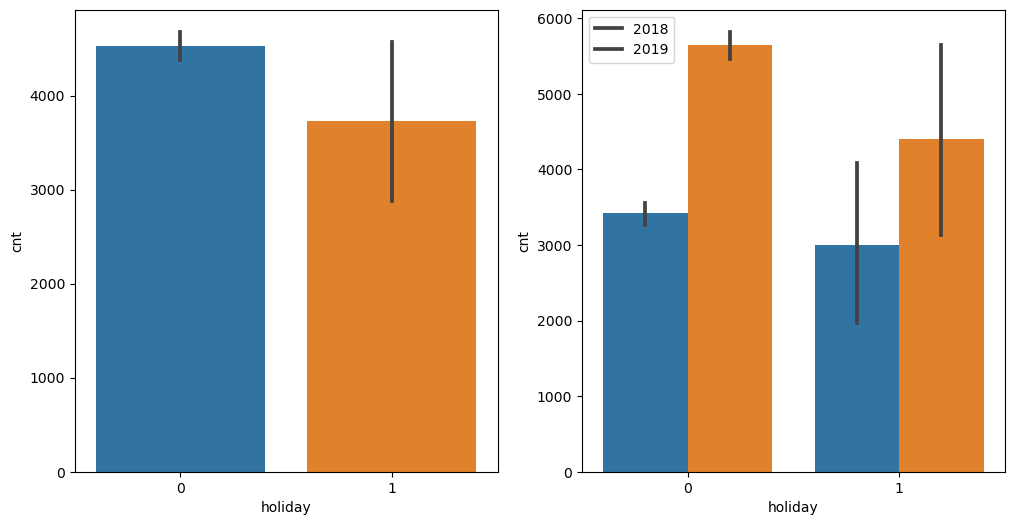

In [21]:
plot_columns('holiday')

- When its holiday, booking seems to be less in number which seems reasonable as on holidays, people may want to spend time at home and enjoy with family.

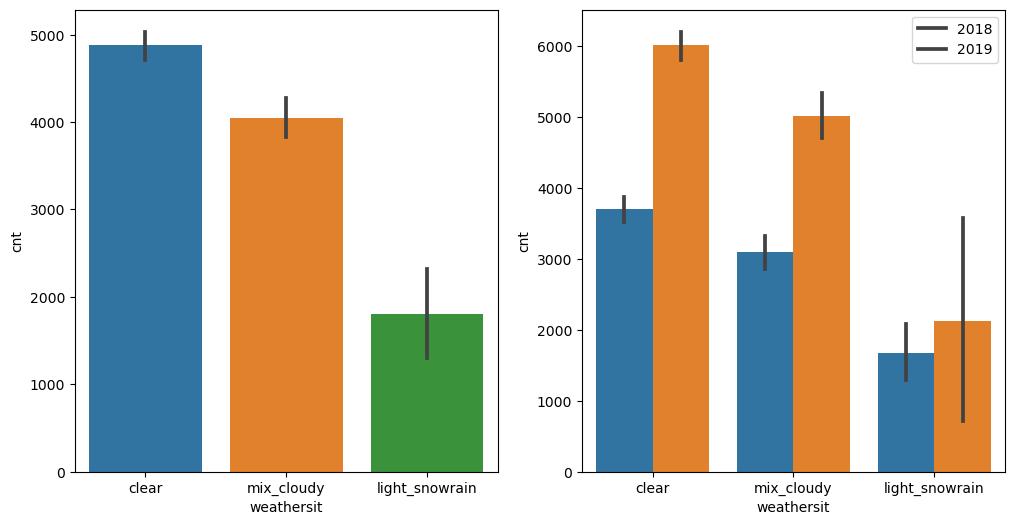

In [22]:
plot_columns('weathersit')

- Clear weather attracted more booking, and in comparison to previous year, i.e 2018, booking increased for each weather situation in 2019.

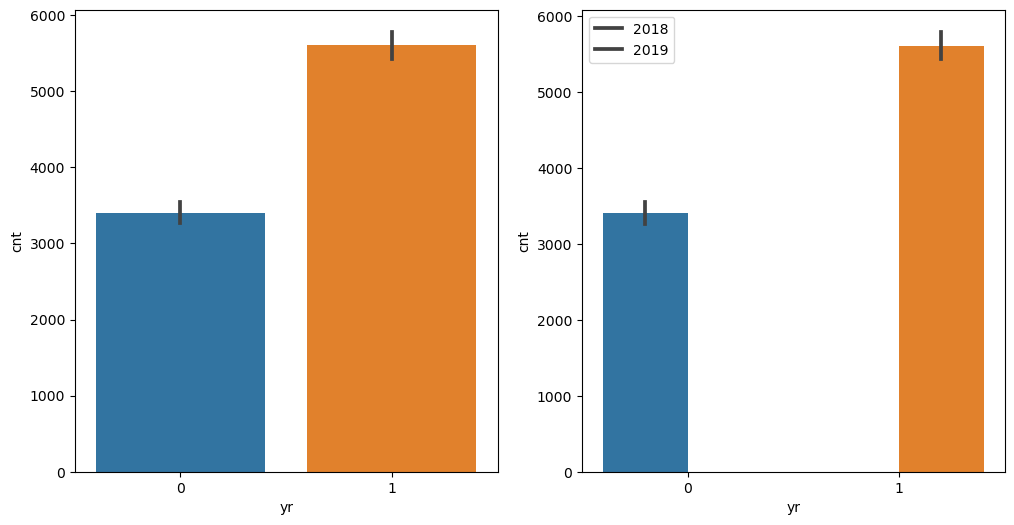

In [23]:
plot_columns('yr')

- 2019 attracted more number of booking from the previous year, which shows good progress in terms of business.

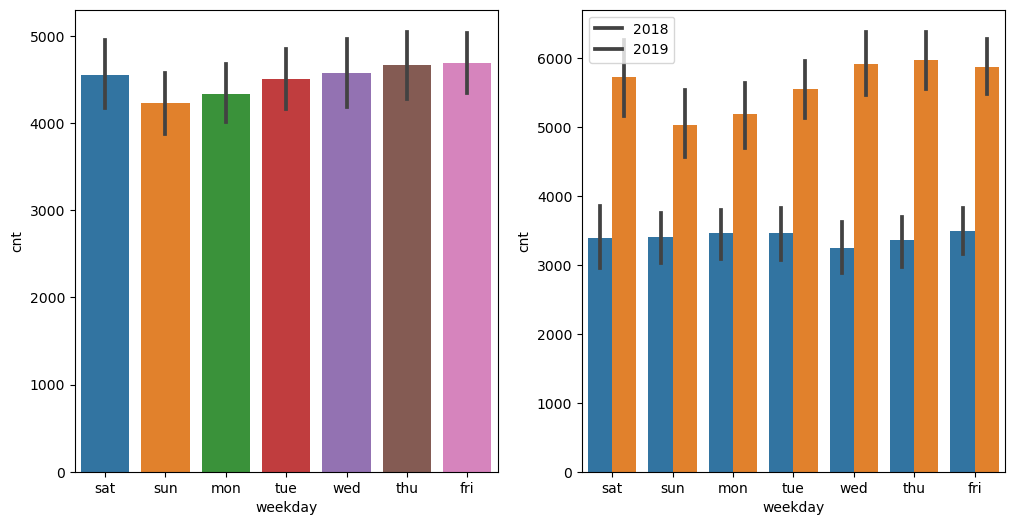

In [24]:
plot_columns('weekday')

Inferences:
- People don't prefer bike rental on weekends. 
Thu, Fir have more number of bookings as compared to the start of the week.

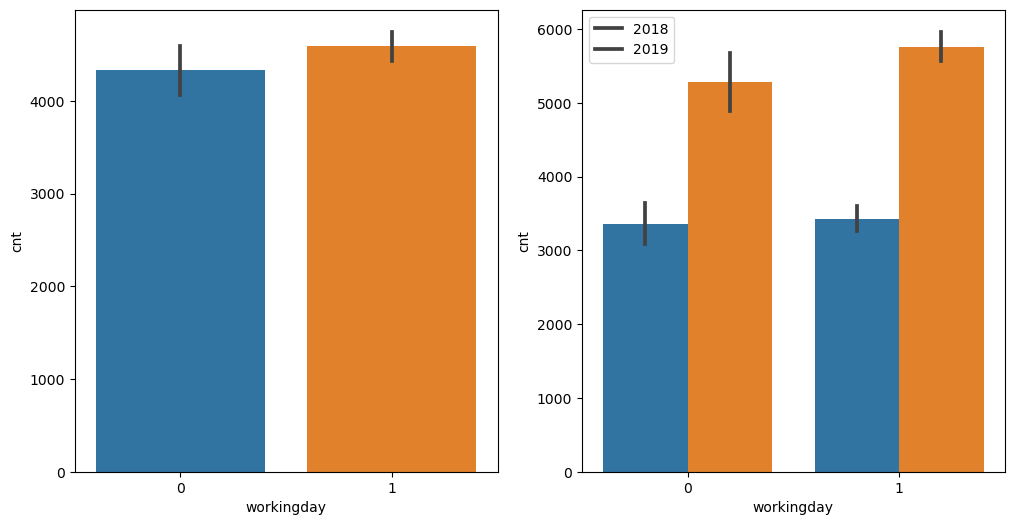

In [25]:
plot_columns('workingday')

Inferences:
- People prefer bike rental on working days.
Booking seemed to be almost equal either on working day or non-working day. But, the count increased from 2018 to 2019.

# Step 3: Data Preparation

Here we will use following steps:

- Splitting the Data into Training and Testing Sets
- Rescaling the Features
- Training the model

In [29]:
#creating dummy vars for mnth,season,weathersit,weekday variable

mnths_biker=pd.get_dummies(biker.mnth,drop_first=True)
season_biker=pd.get_dummies(biker.season,drop_first=True)
weathersit_biker=pd.get_dummies(biker.weathersit,drop_first=True)
weekday_biker=pd.get_dummies(biker.weekday,drop_first=True)

biker.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,mix_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,mix_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [30]:
#merging the dataframe with the dummy variable dataset

df=pd.concat([biker,mnths_biker,season_biker,weathersit_biker,weekday_biker],axis=1)

In [31]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,fall,winter,mix_cloudy,light_snowrain,mon,sat,sun,thu,tue,wed
0,spring,0,jan,0,sat,0,mix_cloudy,14.110847,18.18125,80.5833,...,0,0,1,0,0,1,0,0,0,0
1,spring,0,jan,0,sun,0,mix_cloudy,14.902598,17.68695,69.6087,...,0,0,1,0,0,0,1,0,0,0
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,...,0,0,0,0,1,0,0,0,0,0
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,0,1,0
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,1


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   season          730 non-null    category
 1   yr              730 non-null    int64   
 2   mnth            730 non-null    category
 3   holiday         730 non-null    int64   
 4   weekday         730 non-null    object  
 5   workingday      730 non-null    int64   
 6   weathersit      730 non-null    category
 7   temp            730 non-null    float64 
 8   atemp           730 non-null    float64 
 9   hum             730 non-null    float64 
 10  windspeed       730 non-null    float64 
 11  cnt             730 non-null    int64   
 12  feb             730 non-null    uint8   
 13  mar             730 non-null    uint8   
 14  apr             730 non-null    uint8   
 15  may             730 non-null    uint8   
 16  jun             730 non-null    uint8   
 17  jul             

In [33]:
# dropping unnecessary columns as we have already created dummy variable out of it.

df.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

In [34]:
df.shape

(730, 30)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yr              730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   hum             730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   feb             730 non-null    uint8  
 9   mar             730 non-null    uint8  
 10  apr             730 non-null    uint8  
 11  may             730 non-null    uint8  
 12  jun             730 non-null    uint8  
 13  jul             730 non-null    uint8  
 14  aug             730 non-null    uint8  
 15  sept            730 non-null    uint8  
 16  oct             730 non-null    uint8  
 17  nov             730 non-null    uin

# Splitting the Data into Training and Testing Sets

**As you know, the first basic step for regression is performing a train-test split**.

In [36]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.75, test_size = 0.25, random_state = 100)

#checking the shape of training dataset
print(df_train.shape)

#checking the shape of testing dataset
print(df_test.shape)

(547, 30)
(183, 30)


## Rescaling the Features

There are two common ways of rescaling:
    
- Min-Max scaling (normalization): it converts data between 0 and 1
- Standardisation (mean-0, sigma-1)
This time, we will use MinMax scaling.

In [37]:
from sklearn.preprocessing import MinMaxScaler

In [38]:
scaler = MinMaxScaler()

In [39]:
num_vars =  ['temp', 'atemp', 'hum', 'windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [40]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,feb,mar,...,fall,winter,mix_cloudy,light_snowrain,mon,sat,sun,thu,tue,wed
311,0,0,1,0.435124,0.437339,0.743667,0.057471,0.481247,0,0,...,0,1,0,0,0,0,0,0,1,0
523,1,0,1,0.735215,0.680985,0.482181,0.286093,0.887483,0,0,...,0,0,0,0,0,0,0,0,0,0
381,1,0,1,0.391151,0.374375,0.737917,0.659615,0.335136,0,0,...,0,0,1,0,0,0,0,0,1,0
413,1,0,0,0.358285,0.362754,0.550880,0.319514,0.494248,1,0,...,0,0,0,0,0,1,0,0,0,0
253,0,0,0,0.740406,0.695906,0.735509,0.156398,0.578003,0,0,...,1,0,0,0,0,0,1,0,0,0


In [41]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,feb,mar,...,fall,winter,mix_cloudy,light_snowrain,mon,sat,sun,thu,tue,wed
count,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,...,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000
mean,0.508227,0.027422,0.669104,0.535543,0.511400,0.650673,0.319317,0.511382,0.073126,0.096892,...,0.252285,0.244973,0.349177,0.027422,0.153565,0.151737,0.151737,0.131627,0.135283,0.151737
std,0.500390,0.163460,0.470966,0.225446,0.211788,0.144515,0.169239,0.225008,0.260582,0.296082,...,0.434722,0.430465,0.477146,0.163460,0.360861,0.359094,0.359094,0.338394,0.342339,0.359094
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.336998,0.326287,0.538858,0.197844,0.350437,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.535847,0.521862,0.655216,0.294101,0.514266,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.753113,0.413761,0.682697,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# From above analysis we can see that numeric variabels has scaled between 0 and 1.

# TRAINING THE MODEL

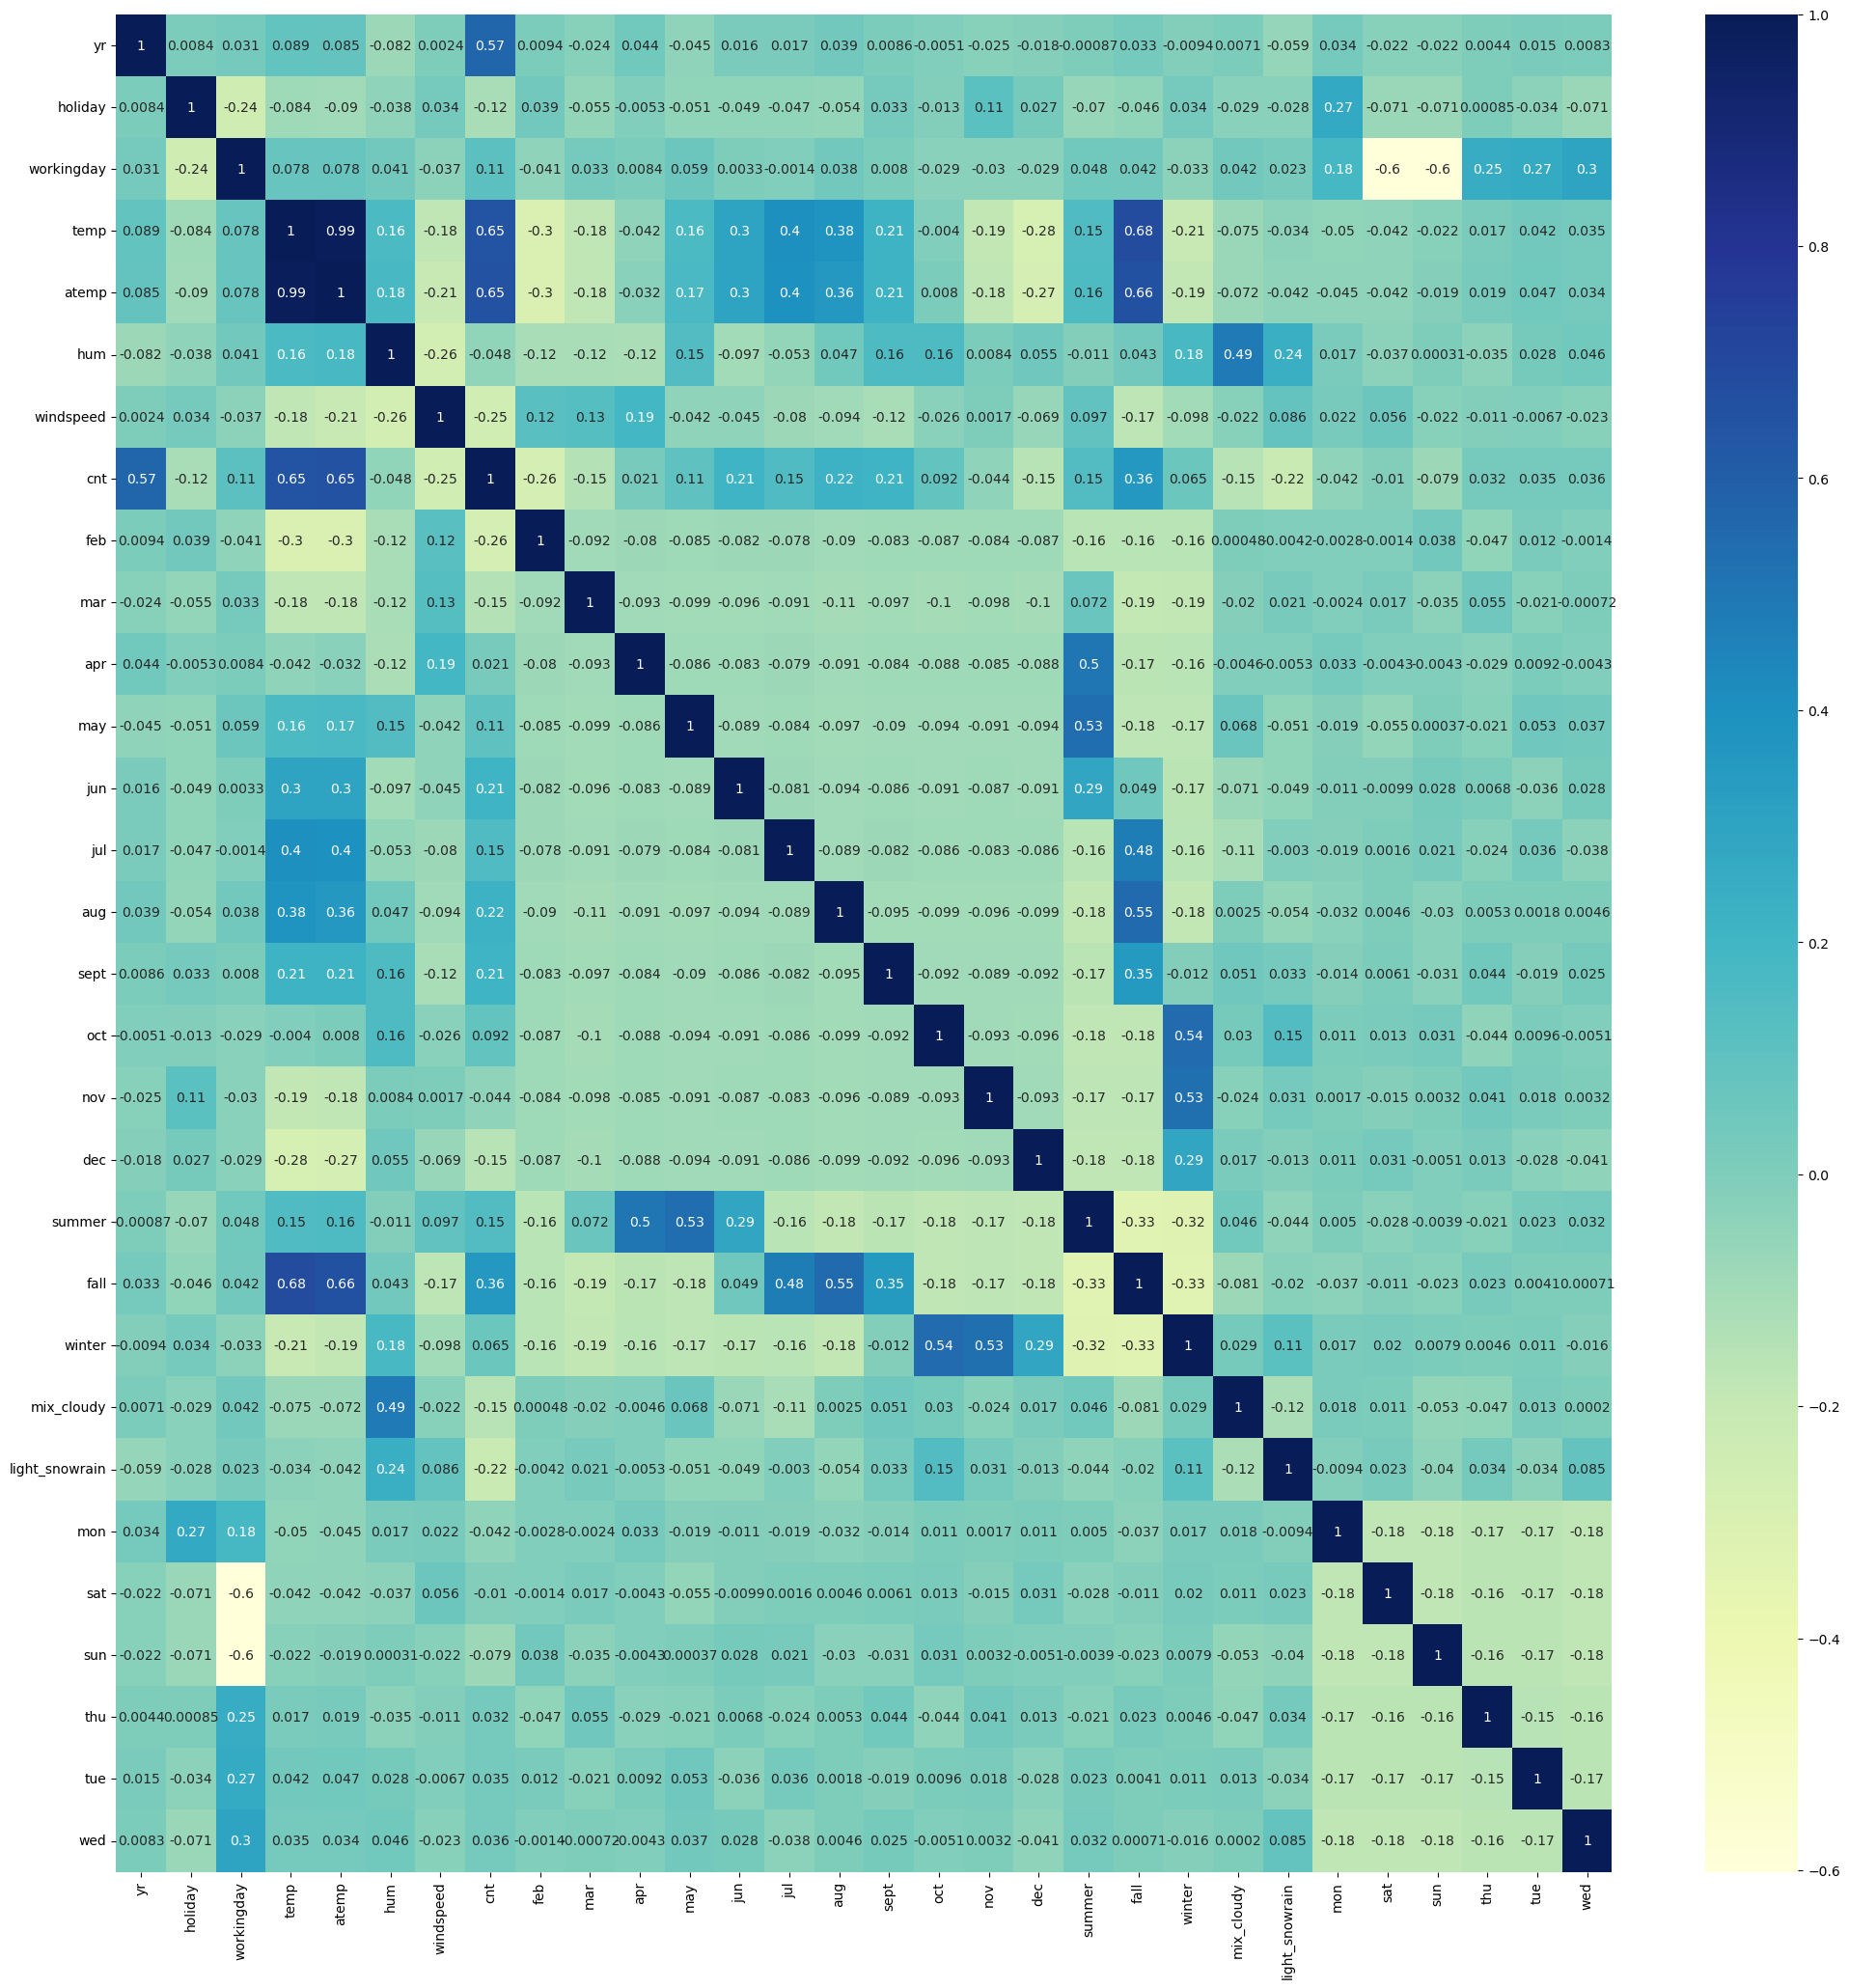

In [42]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (25, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

- cnt seems to have correlation with yr variable and temp. Similarly, Mix_cloudy and hum shows correlation. Spring season with Jan and Feb month, Summer season with may month and Winter season with oct and nov month show good correlation.

In [43]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,feb,mar,...,fall,winter,mix_cloudy,light_snowrain,mon,sat,sun,thu,tue,wed
311,0,0,1,0.435124,0.437339,0.743667,0.057471,0.481247,0,0,...,0,1,0,0,0,0,0,0,1,0
523,1,0,1,0.735215,0.680985,0.482181,0.286093,0.887483,0,0,...,0,0,0,0,0,0,0,0,0,0
381,1,0,1,0.391151,0.374375,0.737917,0.659615,0.335136,0,0,...,0,0,1,0,0,0,0,0,1,0
413,1,0,0,0.358285,0.362754,0.550880,0.319514,0.494248,1,0,...,0,0,0,0,0,1,0,0,0,0
253,0,0,0,0.740406,0.695906,0.735509,0.156398,0.578003,0,0,...,1,0,0,0,0,0,1,0,0,0


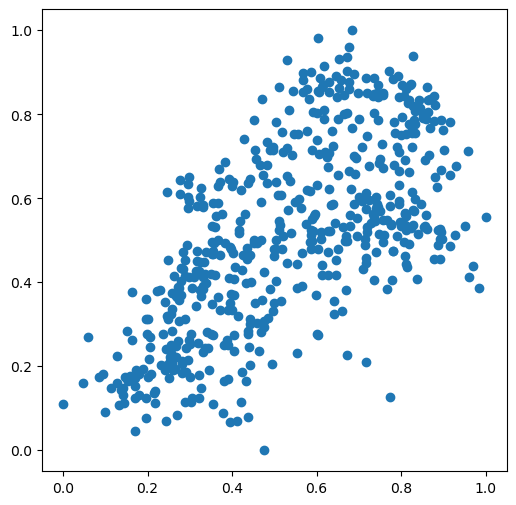

In [44]:
#Visualizing one of the correlation to see the trends via Scatter plot.

plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

- now we can see that positive correlation between temp and cnt.

# step 4:MODEL BUILDING AND EVALUATION

**here we will use following steps**:
    
- Dividing into X and Y sets for the model building
- building a linear model
- Residual Analysis of the train data and validation
- making prediction using the final model
- Model Evaluation

**Dividing into X and Y sets for the model building**

In [45]:
#x_train,y_train
y_train = df_train.pop('cnt')
X_train = df_train

 **building a linear model**

Fit a regression line through the training data using statsmodels. in statsmodel you need to explicitly fit a constant using sm.add_constant(X) because if we don't perform this step, statsmodels fits a regression line passing through the origin, by default

In [46]:
# Building a model with all features using statsmodels :
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr1 = sm.OLS(y_train, X_train_lm).fit()

lr1.params

const             0.150386
yr                0.230799
holiday          -0.022558
workingday        0.078823
temp              0.391615
atemp             0.054732
hum              -0.146786
windspeed        -0.177329
feb               0.027713
mar               0.060681
apr               0.055422
may               0.076799
jun               0.068907
jul               0.024709
aug               0.079394
sept              0.141909
oct               0.065041
nov               0.011734
dec               0.005368
summer            0.095992
fall              0.051909
winter            0.166105
mix_cloudy       -0.059812
light_snowrain   -0.259461
mon              -0.023312
sat               0.074136
sun               0.019984
thu              -0.010611
tue              -0.021888
wed              -0.008645
dtype: float64

In [47]:
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     110.2
Date:                Thu, 19 Sep 2024   Prob (F-statistic):          4.86e-198
Time:                        17:47:16   Log-Likelihood:                 570.73
No. Observations:                 547   AIC:                            -1083.
Df Residuals:                     518   BIC:                            -958.6
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1504      0.022      6.709      0.000       0.106       0.194
yr                 0.2308      0.008     30.023      0.000       0.216       0.246
holiday           -0.0226      0.021     -1.067      0.287      -0.064       0.019
workingday         0.0788      0.010      7.746      0.000       0.059       0.099
temp               0.3916      0.138      2.838      0.005       0.121       0.663
atemp              0.0547      0.136      0.404      0.686      -0.211       0.321
hum               -0.1468      0.037     -3.934      0.000      -0.220      -0.073
windspeed         -0.1773      0.025     -7.069      0.000      -0.227      -0.128
feb                0.0277      0.019      1.449      0.148      -0.010       0.065
mar                0.0607      0.021      2.880      0.004       0.019       0.102
apr                0.0554      0.032      1.720      0.086      -0.008       0.119
may                0.0768      0.035      2.222      0.027       0.009       0.145
jun                0.0689      0.037      1.878      0.061      -0.003       0.141
jul                0.0247      0.042      0.595      0.552      -0.057       0.106
aug                0.0794      0.039      2.010      0.045       0.002       0.157
sept               0.1419      0.035      4.045      0.000       0.073       0.211
oct                0.0650      0.032      2.052      0.041       0.003       0.127
nov                0.0117      0.030      0.387      0.699      -0.048       0.071
dec                0.0054      0.024      0.227      0.821      -0.041       0.052
summer             0.0960      0.023      4.210      0.000       0.051       0.141
fall               0.0519      0.028      1.828      0.068      -0.004       0.108
winter             0.1661      0.024      7.001      0.000       0.119       0.213
mix_cloudy        -0.0598      0.010     -6.002      0.000      -0.079      -0.040
light_snowrain    -0.2595      0.026     -9.971      0.000      -0.311      -0.208
mon               -0.0233      0.015     -1.582      0.114      -0.052       0.006
sat                0.0741      0.012      6.386      0.000       0.051       0.097
sun                0.0200      0.012      1.688      0.092      -0.003       0.043
thu               -0.0106      0.015     -0.707      0.480      -0.040       0.019
tue               -0.0219      0.015     -1.474      0.141      -0.051       0.007
wed               -0.0086      0.015     -0.596      0.551      -0.037       0.020
==============================================================================
Omnibus:                       92.397   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.688
Skew:                          -0.821   Prob(JB):                     2.47e-57
Kurtosis:                   

In [48]:
# Here, we can see that all adjusted R-Squire is 0.848 is pretty good.Lets us see if we can reduce the independet features
# Since number of predictor variables is around 30. It will not be feasible to manually eliminate the insignificance variable.
# Will use hybrid (REF + manual) to elimnate insignifiance variable.

In [49]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [50]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(estimator=lm, n_features_to_select=15)   # running RFE
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 7),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('feb', False, 8),
 ('mar', False, 3),
 ('apr', False, 6),
 ('may', False, 4),
 ('jun', False, 5),
 ('jul', False, 9),
 ('aug', True, 1),
 ('sept', True, 1),
 ('oct', True, 1),
 ('nov', False, 14),
 ('dec', False, 15),
 ('summer', True, 1),
 ('fall', False, 2),
 ('winter', True, 1),
 ('mix_cloudy', True, 1),
 ('light_snowrain', True, 1),
 ('mon', False, 10),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 12),
 ('tue', False, 11),
 ('wed', False, 13)]

In [51]:
# RFE support Variables (selecting the selected variables via RFE in column list)
col = X_train.columns[rfe.support_]
print(len(col))
col

15


Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'aug',
       'sept', 'oct', 'summer', 'winter', 'mix_cloudy', 'light_snowrain',
       'sat', 'sun'],
      dtype='object')

In [52]:
#checking those columns has been rejected (RFE not Supported Variables)

X_train.columns[~rfe.support_]

Index(['atemp', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'nov', 'dec', 'fall',
       'mon', 'thu', 'tue', 'wed'],
      dtype='object')

In [53]:
# Lets consider only  the RFE supported columns for model building 
X_train_rfe = X_train[col]

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Generic function to calculate VIF of variables

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [55]:
calculateVIF(X_train_rfe)

,Features,VIF
2,workingday,31.53
14,sun,7.97
13,sat,7.73
1,holiday,2.23
4,hum,1.88
10,winter,1.72
3,temp,1.61
11,mix_cloudy,1.58
8,oct,1.52
6,aug,1.46


- working day shows high VIF value

In [56]:
# Model 2 
#Add a constant
X_train_lm2 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     217.2
Date:                Thu, 19 Sep 2024   Prob (F-statistic):          1.91e-209
Time:                        17:50:57   Log-Likelihood:                 561.17
No. Observations:                 547   AIC:                            -1092.
Df Residuals:                     532   BIC:                            -1028.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1565      0.021      7.491      0.000       0.115       0.198
yr                 0.2272      0.008     29.807      0.000       0.212       0.242
holiday           -0.0399      0.019     -2.081      0.038      -0.077      -0.002
workingday         0.0781      0.008      9.351      0.000       0.062       0.095
temp               0.5361      0.021     25.313      0.000       0.494       0.578
hum               -0.1714      0.036     -4.801      0.000      -0.242      -0.101
windspeed         -0.1817      0.024     -7.533      0.000      -0.229      -0.134
aug                0.0572      0.016      3.657      0.000       0.026       0.088
sept               0.1256      0.016      8.096      0.000       0.095       0.156
oct                0.0436      0.016      2.660      0.008       0.011       0.076
summer             0.1072      0.010     10.344      0.000       0.087       0.128
winter             0.1390      0.011     12.134      0.000       0.116       0.161
mix_cloudy        -0.0572      0.010     -5.772      0.000      -0.077      -0.038
light_snowrain    -0.2496      0.026     -9.742      0.000      -0.300      -0.199
sat                0.0857      0.010      8.206      0.000       0.065       0.106
sun                0.0325      0.011      3.051      0.002       0.012       0.053
==============================================================================
Omnibus:                       76.873   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              196.268
Skew:                          -0.717   Prob(JB):                     2.40e-43
Kurtosis:                       5.560   Cond. No.                     3.44e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.35e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
# From abvoe analysis all the variables is having low p-values and also adjusted-R-squire value is 0.847 which is been
# increased from 0.843 to 0.847 after droping 14 features, this means most of the features were insignifiance and few were negative collrelatin
# from above VIP table we can see that workingday is having 31.53 vip value which is quite high. lets remove this featues.

In [57]:
# As workingday shows high VIF values hence we can drop it
X_train_rfe2 = X_train_rfe.drop(["workingday"], axis = 1)
X_train_rfe2.head()

,yr,holiday,temp,hum,windspeed,aug,sept,oct,summer,winter,mix_cloudy,light_snowrain,sat,sun
311,0,0,0.435124,0.743667,0.057471,0,0,0,0,1,0,0,0,0
523,1,0,0.735215,0.482181,0.286093,0,0,0,1,0,0,0,0,0
381,1,0,0.391151,0.737917,0.659615,0,0,0,0,0,1,0,0,0
413,1,0,0.358285,0.550880,0.319514,0,0,0,0,0,0,0,1,0
253,0,0,0.740406,0.735509,0.156398,0,1,0,0,0,0,0,0,1


In [58]:
# Run the function to calculate VIF for the new model
calculateVIF(X_train_rfe2)

,Features,VIF
3,hum,14.57
2,temp,10.01
4,windspeed,3.65
9,winter,2.26
10,mix_cloudy,2.16
0,yr,2.01
8,summer,1.86
7,oct,1.65
5,aug,1.60
6,sept,1.35


In [59]:
# Model 3 
#Add a constant
X_train_lm3 = sm.add_constant(X_train_rfe2)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     217.2
Date:                Thu, 19 Sep 2024   Prob (F-statistic):          1.91e-209
Time:                        17:51:32   Log-Likelihood:                 561.17
No. Observations:                 547   AIC:                            -1092.
Df Residuals:                     532   BIC:                            -1028.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2346      0.026      9.089      0.000       0.184       0.285
yr                 0.2272      0.008     29.807      0.000       0.212       0.242
holiday           -0.1180      0.023     -5.043      0.000      -0.164      -0.072
temp               0.5361      0.021     25.313      0.000       0.494       0.578
hum               -0.1714      0.036     -4.801      0.000      -0.242      -0.101
windspeed         -0.1817      0.024     -7.533      0.000      -0.229      -0.134
aug                0.0572      0.016      3.657      0.000       0.026       0.088
sept               0.1256      0.016      8.096      0.000       0.095       0.156
oct                0.0436      0.016      2.660      0.008       0.011       0.076
summer             0.1072      0.010     10.344      0.000       0.087       0.128
winter             0.1390      0.011     12.134      0.000       0.116       0.161
mix_cloudy        -0.0572      0.010     -5.772      0.000      -0.077      -0.038
light_snowrain    -0.2496      0.026     -9.742      0.000      -0.300      -0.199
sat                0.0076      0.011      0.703      0.482      -0.014       0.029
sun               -0.0456      0.011     -4.236      0.000      -0.067      -0.024
==============================================================================
Omnibus:                       76.873   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              196.268
Skew:                          -0.717   Prob(JB):                     2.40e-43
Kurtosis:                       5.560   Cond. No.                         18.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# From above we can see that weekday_sat is having high pValue 0.482>0.05  and hum VIP is 14.57>5.
# Lets drop weekday_sat

In [60]:
X_train_rfe3 = X_train_rfe2.drop(["sat"], axis = 1)
calculateVIF(X_train_rfe3)

,Features,VIF
3,hum,14.46
2,temp,10.01
4,windspeed,3.60
9,winter,2.26
10,mix_cloudy,2.16
0,yr,2.01
8,summer,1.86
7,oct,1.65
5,aug,1.60
6,sept,1.35


In [61]:
# Model 4
#Add a constant
X_train_lm4 = sm.add_constant(X_train_rfe3)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()
lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     234.1
Date:                Thu, 19 Sep 2024   Prob (F-statistic):          1.56e-210
Time:                        17:51:48   Log-Likelihood:                 560.92
No. Observations:                 547   AIC:                            -1094.
Df Residuals:                     533   BIC:                            -1034.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2366      0.026      9.229      0.000       0.186       0.287
yr                 0.2270      0.008     29.813      0.000       0.212       0.242
holiday           -0.1195      0.023     -5.131      0.000      -0.165      -0.074
temp               0.5356      0.021     25.316      0.000       0.494       0.577
hum               -0.1723      0.036     -4.833      0.000      -0.242      -0.102
windspeed         -0.1810      0.024     -7.514      0.000      -0.228      -0.134
aug                0.0574      0.016      3.672      0.000       0.027       0.088
sept               0.1259      0.016      8.118      0.000       0.095       0.156
oct                0.0438      0.016      2.671      0.008       0.012       0.076
summer             0.1071      0.010     10.339      0.000       0.087       0.127
winter             0.1391      0.011     12.150      0.000       0.117       0.162
mix_cloudy        -0.0571      0.010     -5.763      0.000      -0.077      -0.038
light_snowrain    -0.2493      0.026     -9.737      0.000      -0.300      -0.199
sun               -0.0470      0.011     -4.442      0.000      -0.068      -0.026
==============================================================================
Omnibus:                       74.555   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              195.284
Skew:                          -0.688   Prob(JB):                     3.93e-43
Kurtosis:                       5.583   Cond. No.                         18.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
# we can see that Adj. R-squire is 0.847 and pvalue is less than 0.05 for every features.
# VIP for hum is 14.57>5.so Lets frist remove the hum.

In [63]:
X_train_rfe4 = X_train_rfe3.drop(["hum"], axis = 1)
calculateVIF(X_train_rfe4)

,Features,VIF
2,temp,5.33
3,windspeed,3.12
0,yr,1.99
8,winter,1.96
7,summer,1.86
6,oct,1.63
4,aug,1.60
9,mix_cloudy,1.51
5,sept,1.35
11,sun,1.17


In [64]:
X_train_lm5 = sm.add_constant(X_train_rfe4)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()
lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     241.6
Date:                Thu, 19 Sep 2024   Prob (F-statistic):          8.67e-207
Time:                        17:51:56   Log-Likelihood:                 549.19
No. Observations:                 547   AIC:                            -1072.
Df Residuals:                     534   BIC:                            -1016.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1376      0.016      8.744      0.000       0.107       0.169
yr                 0.2311      0.008     29.921      0.000       0.216       0.246
holiday           -0.1208      0.024     -5.083      0.000      -0.168      -0.074
temp               0.5155      0.021     24.346      0.000       0.474       0.557
windspeed         -0.1486      0.024     -6.291      0.000      -0.195      -0.102
aug                0.0558      0.016      3.497      0.001       0.024       0.087
sept               0.1193      0.016      7.569      0.000       0.088       0.150
oct                0.0408      0.017      2.440      0.015       0.008       0.074
summer             0.1048      0.011      9.926      0.000       0.084       0.126
winter             0.1310      0.012     11.334      0.000       0.108       0.154
mix_cloudy        -0.0847      0.008    -10.255      0.000      -0.101      -0.068
light_snowrain    -0.2958      0.024    -12.211      0.000      -0.343      -0.248
sun               -0.0497      0.011     -4.610      0.000      -0.071      -0.029
==============================================================================
Omnibus:                       72.861   Durbin-Watson:                   2.082
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              191.226
Skew:                          -0.672   Prob(JB):                     2.99e-42
Kurtosis:                       5.566   Cond. No.                         10.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
#From the above  Model Summary Report we can say that all the p-values of respective features are less than 0.05.
# Note: It is a hurestic approach that, if VIF value of any predictor is between 5 & 10, it is recommended to scrutinize such variable from business perspective and analyse any outliers & drop such feature if VIF is greater than 10
# So we can now fix this 

In [66]:
#checking the parameters and their coefficient values
lr5.params

const             0.137643
yr                0.231135
holiday          -0.120818
temp              0.515527
windspeed        -0.148559
aug               0.055815
sept              0.119327
oct               0.040805
summer            0.104833
winter            0.131022
mix_cloudy       -0.084705
light_snowrain   -0.295816
sun              -0.049686
dtype: float64

### Linear Regrssion Assumptions Proofs
## Residual Analysis of the train data and validation

In [67]:
# Lets perform Residual Analysis
y_train_pred = lr5.predict(X_train_lm5)
residual = y_train_pred - y_train

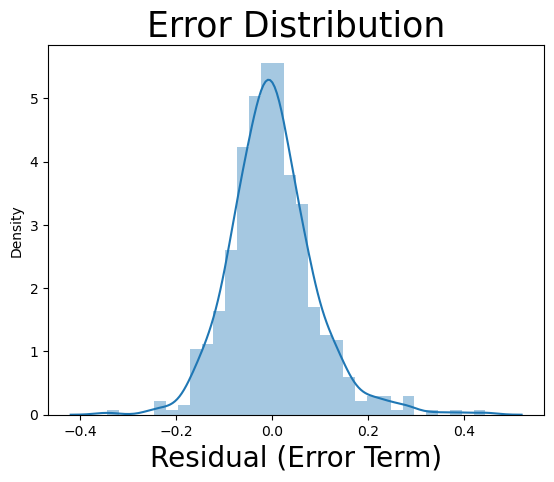

In [68]:
#1. Assumption of Normally Distributed Error Term

# Plot the histogram of the error terms
sns.distplot(residual)
plt.xlabel('Residual (Error Term)', fontdict={'fontsize': 20})
plt.title('Error Distribution', fontdict={'fontsize': 25})
plt.show() 

- From the above graph it is evident that Error Distribution Is Normallly Distributed Across 0, which indicates that our model has handled the assumption of Error Normal Distribution properly
- Error terms are following normal distribution

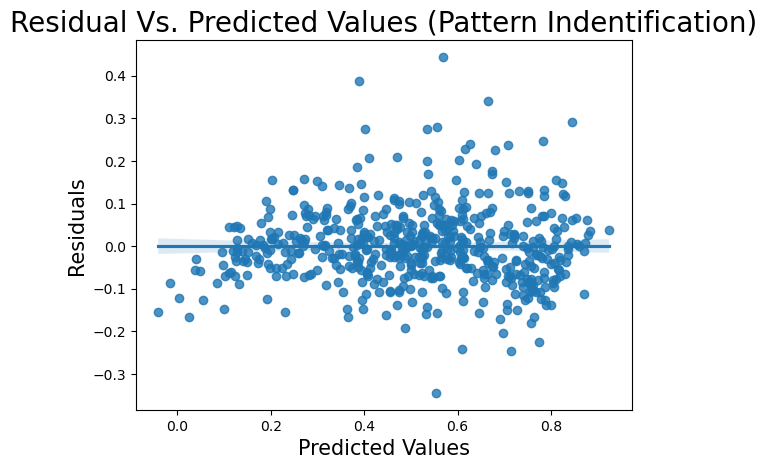

In [69]:
#2 Assumption of Error Terms Being Independent

sns.regplot(x=y_train_pred, y=residual)
plt.title('Residual Vs. Predicted Values (Pattern Indentification)', fontdict={'fontsize': 20})
plt.xlabel('Predicted Values', fontdict={'fontsize': 15})
plt.ylabel('Residuals', fontdict={'fontsize': 15})
plt.show()

- From the above graph, we see that there is almost no relation between Residual & Predicted Value

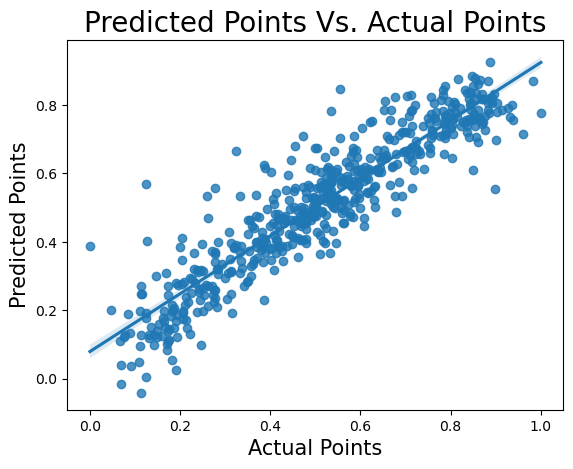

In [70]:
# 3. Homoscedasticity

sns.regplot(x=y_train, y=y_train_pred)
plt.title('Predicted Points Vs. Actual Points', fontdict={'fontsize': 20})
plt.xlabel('Actual Points', fontdict={'fontsize': 15})
plt.ylabel('Predicted Points', fontdict={'fontsize': 15})
plt.show()

In [ ]:
# we can see that variance is  similar from both end of fitted line.

**Multi Collinearity**

In [71]:
calculateVIF(X_train_rfe4)

,Features,VIF
2,temp,5.33
3,windspeed,3.12
0,yr,1.99
8,winter,1.96
7,summer,1.86
6,oct,1.63
4,aug,1.60
9,mix_cloudy,1.51
5,sept,1.35
11,sun,1.17


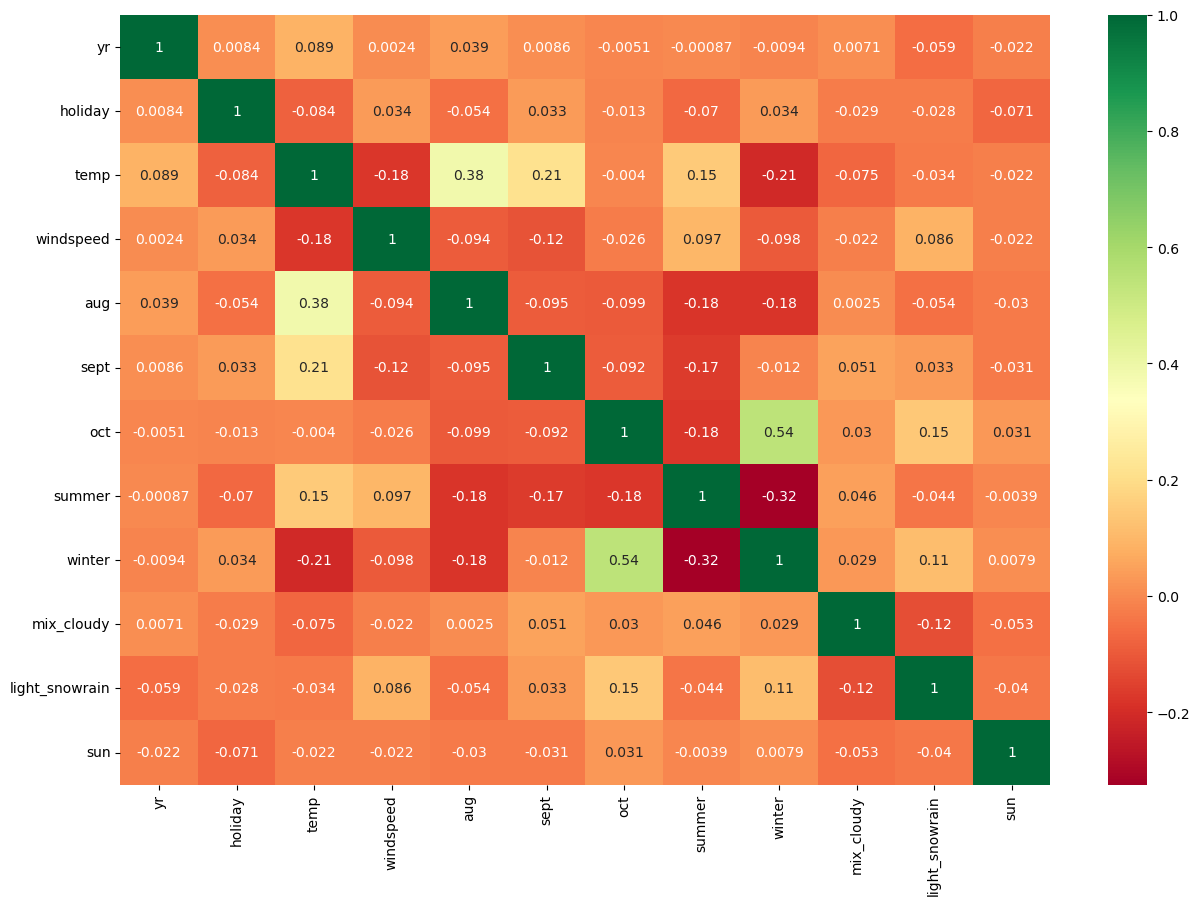

In [72]:
plt.figure(figsize=(15,10))
sns.heatmap(X_train_rfe4.corr(),annot = True, cmap="RdYlGn")
plt.show()

- As per above analysis we didn't found multi-colinearity among independedt variables.

# making prediction using the final model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. 5th model.

 **Applying the scaling on the test sets**

In [73]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [74]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,feb,mar,...,fall,winter,mix_cloudy,light_snowrain,mon,sat,sun,thu,tue,wed
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,1,0,1,0,1,0,0,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,0,0,0,0,0,0,0,1
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,1,1,0,0,0,0,1,0,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,1,0,0,0,0,0,0,0,0,1
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,0,0,0,0,0,0,0,1,0,0


In [75]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,feb,mar,...,fall,winter,mix_cloudy,light_snowrain,mon,sat,sun,thu,tue,wed
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,...,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,0.475410,0.032787,0.726776,0.568688,0.542076,0.635166,0.316439,0.530233,0.087432,0.049180,...,0.273224,0.240437,0.300546,0.032787,0.114754,0.120219,0.120219,0.174863,0.163934,0.109290
std,0.500765,0.178567,0.446837,0.234887,0.219336,0.152926,0.159371,0.215783,0.283242,0.216838,...,0.446837,0.428521,0.459754,0.178567,0.319599,0.326109,0.326109,0.380892,0.371232,0.312858
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.362754,0.354867,0.522601,0.199183,0.393293,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.575304,0.558309,0.618721,0.303464,0.533134,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.774153,0.729061,0.735079,0.404383,0.681086,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [76]:
# divie into x and y
y_test = df_test.pop('cnt')
X_test = df_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 184 to 189
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yr              183 non-null    int64  
 1   holiday         183 non-null    int64  
 2   workingday      183 non-null    int64  
 3   temp            183 non-null    float64
 4   atemp           183 non-null    float64
 5   hum             183 non-null    float64
 6   windspeed       183 non-null    float64
 7   feb             183 non-null    uint8  
 8   mar             183 non-null    uint8  
 9   apr             183 non-null    uint8  
 10  may             183 non-null    uint8  
 11  jun             183 non-null    uint8  
 12  jul             183 non-null    uint8  
 13  aug             183 non-null    uint8  
 14  sept            183 non-null    uint8  
 15  oct             183 non-null    uint8  
 16  nov             183 non-null    uint8  
 17  dec             183 non-null    u

In [77]:
X_test=X_test[X_train_rfe4.columns]
# Adding constant variable to test dataframe
X_test_lr5 = sm.add_constant(X_test)
X_test_lr5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 184 to 189
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   const           183 non-null    float64
 1   yr              183 non-null    int64  
 2   holiday         183 non-null    int64  
 3   temp            183 non-null    float64
 4   windspeed       183 non-null    float64
 5   aug             183 non-null    uint8  
 6   sept            183 non-null    uint8  
 7   oct             183 non-null    uint8  
 8   summer          183 non-null    uint8  
 9   winter          183 non-null    uint8  
 10  mix_cloudy      183 non-null    uint8  
 11  light_snowrain  183 non-null    uint8  
 12  sun             183 non-null    uint8  
dtypes: float64(3), int64(2), uint8(8)
memory usage: 10.0 KB


In [78]:
y_test_pred = lr5.predict(X_test_lr5)

In [79]:
 lr5.params

const             0.137643
yr                0.231135
holiday          -0.120818
temp              0.515527
windspeed        -0.148559
aug               0.055815
sept              0.119327
oct               0.040805
summer            0.104833
winter            0.131022
mix_cloudy       -0.084705
light_snowrain   -0.295816
sun              -0.049686
dtype: float64

In [80]:
# Generating R-Square

from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.7795576077290953

In [81]:
train_adjuested_r_2=0.841
train_r2=0.844

In [82]:
# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

test_adjusted_r2 = 1-(1-train_r2)*(n-1)/(n-p-1)
test_adjusted_r2

0.8329882352941176

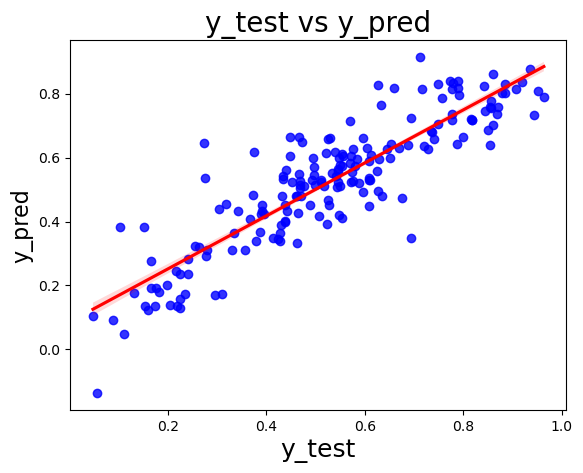

In [83]:
plt.figure()
sns.regplot(x=y_test, y=y_test_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

**Comparision between Training and Testing dataset**:
    
- Train R-squire=0.844
- Test R-squire=0.7795
- Train Adj-R-squire=0.841
- Test Adj-R-squire=0.832


**cnt** = 0.1376 + (0.2311)*yr + (-0.1208)*holiday + (0.5155)*temp + (-0.1485)*windspeed + (0.1193)*sept + (0.0558)*aug + (0.0408)*oct + (-0.0496)*sun + (-0.0847)*mix_cloudy + (-0.29578)*light_snowrain + (0.1048)*summer + (0.1310)*winter 

**Demand of bikes depend on yr, holiday, temp, windspeed, sep, aug, oct, mix_cloudy, light_snowrain, sun, summer and winter**.